# Solutions

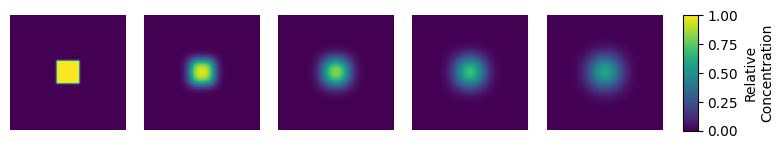

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

def smooth(x):
    n = len(x)
    result = np.zeros((n, n))
    for i in range(1, n-1):
        for j in range(1, n-1):
            result[i,j] = np.average(x[i-1:i+2,j-1:j+2])
    return result

def diffuse(x, d):
    n = len(x)
    result = np.zeros((n, n))
    for i in range(1, n-1):
        for j in range(1, n-1):
            total = np.sum(x[i-1:i+2,j-1:j+2]) - x[i,j]

            result[i,j] = x[i,j] + total * d - x[i,j] * 8 * d
    return result

n = 40
N = 4

grid = np.zeros((n, n))
grid[16:24,16:24] = 1

gs_kw = dict(width_ratios=[1, 1, 1, 1, 1, .2], wspace=0)
fig, axes = plt.subplots(1, N + 2, figsize=(9,1.5), gridspec_kw=gs_kw)
fig.subplots_adjust(wspace=0, hspace=0)

pcm = axes[0].imshow(grid, vmin=0, vmax=1)
axes[0].axis("off")
for i in range(N):
    for j in range(2 ** N):
        grid = diffuse(grid, 0.03)
        axes[i+1].imshow(grid, vmin=0, vmax=1)
        axes[i+1].axis("off")
axes[-1].axis("off")
cbar = fig.colorbar(pcm, ax = axes[-1], fraction=0.55, aspect=8)
cbar.set_label("Relative\nConcentration")












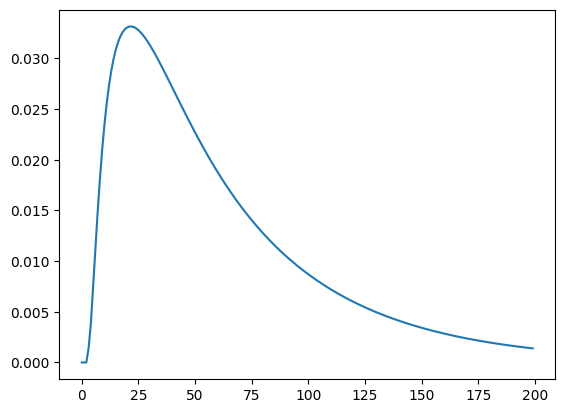

In [13]:
N = 200 # number of time steps
n = 20 # size of region
z = np.zeros((N, n, n))

z_init = np.zeros((n, n))

# set the inital concentrations

z_init[8:11,8:11] = 1

z[0,:,:] = z_init

for i in range(N-1):
    z[i+1,:,:] = smooth(z[i,:,:])
    # set z[i,:,:] to the value of the next moving average
    #plt.figure()
    #plt.imshow(z[i,:,:])


plt.figure()
plt.plot(z[:,5,5])



In [3]:
z

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 